# Happy Face Classification using Sequential API

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops

%matplotlib inline
np.random.seed(1)

In [2]:
import h5py

In [3]:
train_file = h5py.File('Datasets/train_happy.h5', 'r')
test_file = h5py.File('Datasets/test_happy.h5', 'r')

In [4]:
train_keys = train_file.keys()
test_keys = test_file.keys()

print("Keys in train_file:", train_keys)
print("Keys in test_file:", test_keys)

Keys in train_file: <KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>
Keys in test_file: <KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>


In [5]:
train_x = np.array(train_file['train_set_x'][:])
train_y = np.array(train_file['train_set_y'][:])

test_x = np.array(test_file['test_set_x'][:])
test_y = np.array(test_file['test_set_y'][:])

In [6]:
print(train_x.shape)
print(train_y.shape)

(600, 64, 64, 3)
(600,)


In [7]:
print(test_x.shape)
print(test_y.shape)

(150, 64, 64, 3)
(150,)


In [8]:
train_y = train_y.reshape((1, train_y.shape[0]))
test_y = test_y.reshape((1, test_y.shape[0]))

In [9]:
print(train_y.shape)
print(test_y.shape)

(1, 600)
(1, 150)


In [10]:
print(train_y)

[[0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1
  0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1
  0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0
  1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0
  0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1
  0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0
  1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1
  1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0
  1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1
  0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1
  0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1
  1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0
  1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 

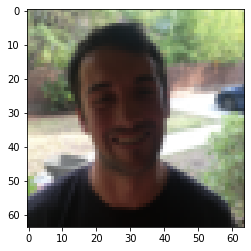

In [11]:
plt.imshow(train_x[500]);
plt.show();

In [12]:
X_train = train_x / 255.0
X_test = test_x / 255.0

y_train = train_y.T
y_test = test_y.T

In [13]:
print(y_train[500])

[1]


### Model Building - Sequantial

In [14]:
def happy_model():
    model = tf.keras.Sequential([
        tfl.ZeroPadding2D(padding=(3,3), input_shape=(64,64,3)),
        tfl.Conv2D(32, 7, strides=(1,1)),
        tfl.BatchNormalization(axis=3),
        tfl.ReLU(),
        tfl.MaxPool2D(),
        tfl.Flatten(),
        tfl.Dense(1, activation='sigmoid')
    ])
    return model

In [15]:
happy_model = happy_model()

In [16]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [17]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 70, 70, 3)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                        

### Train and Evaluate the Model

In [18]:
happy_model.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 5s 85ms/step - loss: 1.2457 - accuracy: 0.7033
Epoch 2/10
38/38 [==============================] - 3s 87ms/step - loss: 0.1988 - accuracy: 0.9233
Epoch 3/10
38/38 [==============================] - 3s 86ms/step - loss: 0.1515 - accuracy: 0.9500
Epoch 4/10
38/38 [==============================] - 3s 81ms/step - loss: 0.1764 - accuracy: 0.9333
Epoch 5/10
38/38 [==============================] - 3s 82ms/step - loss: 0.2942 - accuracy: 0.8950
Epoch 6/10
38/38 [==============================] - 3s 83ms/step - loss: 0.4336 - accuracy: 0.8767
Epoch 7/10
38/38 [==============================] - 3s 84ms/step - loss: 0.2244 - accuracy: 0.9233
Epoch 8/10
38/38 [==============================] - 3s 85ms/step - loss: 0.1182 - accuracy: 0.9633
Epoch 9/10
38/38 [==============================] - 4s 95ms/step - loss: 0.1103 - accuracy: 0.9667
Epoch 10/10
38/38 [==============================] - 4s 97ms/step - loss: 0.0703 - accuracy: 0.9683


In [19]:
happy_model.evaluate(X_test, y_test)

5/5 [==============================] - 1s 41ms/step - loss: 0.1024 - accuracy: 0.9533


[0.10236315429210663, 0.95333331823349]

# Functional API - Hand Digit Sign Dataset

In [20]:
train_file = h5py.File('Datasets/train_signs.h5', 'r')
test_file = h5py.File('Datasets/test_signs.h5', 'r')

In [21]:
print('Train_keys:', train_file.keys())
print('Test_keys:', test_file.keys())

Train_keys: <KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>
Test_keys: <KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>


In [22]:
train_x = np.array(train_file['train_set_x'][:])
train_y = np.array(train_file['train_set_y'][:])

test_x = np.array(test_file['test_set_x'][:])
test_y = np.array(test_file['test_set_y'][:])

In [23]:
print(train_x.shape)
print(train_y.shape)

(1080, 64, 64, 3)
(1080,)


In [24]:
print(test_y.shape)
print(test_y.shape)

(120,)
(120,)


In [25]:
print(train_y)

[5 0 2 ... 2 4 5]


In [26]:
train_y = train_y.reshape((1, train_y.shape[0]))
test_y = test_y.reshape((1, test_y.shape[0]))

In [27]:
print(train_y.shape)
print(test_y.shape)

(1, 1080)
(1, 120)


In [28]:
print(train_y)

[[5 0 2 ... 2 4 5]]


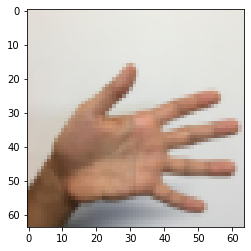

In [29]:
plt.imshow(train_x[0])
plt.show();

In [30]:
X_train = train_x / 255.0
X_test = test_x / 255.0

In [31]:
y_train = tf.keras.utils.to_categorical(train_y, num_classes=6)[0]
y_test = tf.keras.utils.to_categorical(test_y, num_classes=6)[0]

In [32]:
y_train.shape

(1080, 6)

In [33]:
y_test.shape

(120, 6)

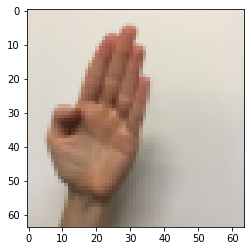

y: [0. 0. 0. 0. 1. 0.]


In [34]:
plt.imshow(X_train[1020])
plt.show();

print('y:', y_train[1020])

In [35]:
X_train[0]

array([[[0.89019608, 0.8627451 , 0.83921569],
        [0.89019608, 0.86666667, 0.84313725],
        [0.89019608, 0.87058824, 0.84313725],
        ...,
        [0.90980392, 0.90196078, 0.87843137],
        [0.90588235, 0.89803922, 0.87058824],
        [0.90196078, 0.89803922, 0.86666667]],

       [[0.89019608, 0.86666667, 0.83921569],
        [0.89019608, 0.86666667, 0.84313725],
        [0.89411765, 0.86666667, 0.84313725],
        ...,
        [0.90980392, 0.90196078, 0.87843137],
        [0.90588235, 0.89803922, 0.87058824],
        [0.90588235, 0.89803922, 0.86666667]],

       [[0.89019608, 0.86666667, 0.83921569],
        [0.89019608, 0.86666667, 0.83921569],
        [0.89019608, 0.86666667, 0.84313725],
        ...,
        [0.90980392, 0.90196078, 0.87843137],
        [0.90588235, 0.89803922, 0.8745098 ],
        [0.90196078, 0.89803922, 0.86666667]],

       ...,

       [[0.46666667, 0.31764706, 0.2       ],
        [0.48627451, 0.33333333, 0.21568627],
        [0.49803922, 0

In [36]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("y_test shape: " + str(y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
y_test shape: (120, 6)


### Model Building - Functional API

In [37]:
def conv_model(input_shape):
    input_img = tf.keras.Input(shape=input_shape)
    Z1 = tfl.Conv2D(8,4, strides=(1,1), padding='same')(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPool2D(pool_size=(8,8), strides=(8,8), padding='same')(A1)
    Z2 = tfl.Conv2D(16, 2, strides=(1,1), padding='same')(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPool2D(pool_size=(4,4), strides=(4,4), padding='same')(A2)
    F = tfl.Flatten()(P2)
    outputs = tfl.Dense(6, activation='softmax')(F)
    
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [38]:
sign_model = conv_model((64,64,3))

In [39]:
sign_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [40]:
sign_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         392       
                                                                 
 re_lu_1 (ReLU)              (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_2 (ReLU)              (None, 8, 8, 16)          0         
                                                             

In [41]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(64)

In [ ]:
# Train the model
history = sign_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 3s 117ms/step - loss: 1.8082 - accuracy: 0.1231 - val_loss: 1.7920 - val_accuracy: 0.1500
Epoch 2/100
17/17 [==============================] - 1s 82ms/step - loss: 1.7936 - accuracy: 0.1537 - val_loss: 1.7876 - val_accuracy: 0.1750
Epoch 3/100
17/17 [==============================] - 1s 78ms/step - loss: 1.7850 - accuracy: 0.1843 - val_loss: 1.7809 - val_accuracy: 0.2000
Epoch 4/100
17/17 [==============================] - 1s 78ms/step - loss: 1.7795 - accuracy: 0.1778 - val_loss: 1.7759 - val_accuracy: 0.2167
Epoch 5/100
17/17 [==============================] - 1s 77ms/step - loss: 1.7740 - accuracy: 0.1991 - val_loss: 1.7692 - val_accuracy: 0.2667
Epoch 6/100
17/17 [==============================] - 1s 80ms/step - loss: 1.7677 - accuracy: 0.2315 - val_loss: 1.7632 - val_accuracy: 0.3000
Epoch 7/100
17/17 [==============================] - 1s 77ms/step - loss: 1.7614 - accuracy: 0.2481 - val_loss: 1.7563 - val_accuracy: 0.3167
Epoch

In [ ]:
# History Object
history.history

In [ ]:
# Ploting Losses and Accuracies vs epochs
df_loss_acc = pd.DataFrame(history.history)
# print(df_loss_acc)
df_loss_acc.rename(columns={'loss':'train_loss', 'accuracy':'train_accuracy'}, inplace=True)
df_loss = df_loss_acc[['train_loss', 'val_loss']]
df_acc = df_loss_acc[['train_accuracy', 'val_accuracy']]

# Plot
df_loss.plot(title='Model Losses', figsize=(10,6)).set(xlabel='Epochs', ylabel='Losses');
df_acc.plot(title='Model Accuracies', figsize=(10,6)).set(xlabel='Epochs', ylabel='Accuracies');

In [ ]:
# Test on an image
plt.imshow(X_test[30])
plt.show();

In [ ]:
X_test[30].shape

In [ ]:
pred = sign_model.predict(X_test[[30]])

In [ ]:
np.set_printoptions(suppress=True)
print(pred)